In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [14]:
df = pd.read_excel('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/staging-paramaters/pooled_hole_number.xlsx')

df['Ratio'] = (df['number of females'].astype(str) + ':' + df['number of males'].astype(str))

df

,Vile Code,experiment_week,number of females,number of males,Age of Females,staging time,Net Loss,Total Pupa,Day4 no.holes,Unnamed: 9,Unnamed: 10,Unnamed: 11,Ratio
0,TUE_AM_1,NaT,50,20,7,4h,1.0,190,37,NaN,NaN,NaN,50:20
1,TUE_AM_3,NaT,60,20,7,4h,0.0,218,28,NaN,NaN,NaN,60:20
2,TUE_AM_7,NaT,40,20,7,4h,0.0,142,16,NaN,NaN,NaN,40:20
3,TUE_AM_8,NaT,40,20,7,4h,0.0,144,14,NaN,NaN,NaN,40:20
4,TUE_AM_3,NaT,60,20,8,4h,NaN,238,63,NaN,NaN,NaN,60:20
5,TUE_AM_4,NaT,60,20,8,4h,3.0,150,9,NaN,NaN,NaN,60:20
6,TUE_AM_6,NaT,40,20,8,4h,3.0,210,32,NaN,NaN,NaN,40:20
7,WED_AM_3,NaT,60,20,7,4h,2.0,163,20,NaN,NaN,NaN,60:20
8,TUE_AM_1,NaT,50,20,9,4h,1.0,239,40,NaN,NaN,NaN,50:20
9,TUE_AM_2,NaT,50,20,9,4h,3.0,198,31,NaN,NaN,NaN,50:20


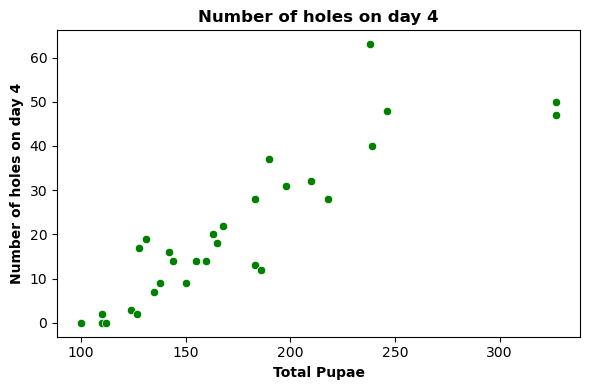

In [9]:
plt.figure(figsize=(6, 4))

sns.scatterplot(data=df, x='Total Pupa', y='Day4 no.holes', color='green')

plt.title('Number of holes on day 4', fontweight='bold')
plt.xlabel('Total Pupae', fontweight='bold')
plt.ylabel('Number of holes on day 4', fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/totalpupa_holenumber.png', dpi=300, bbox_inches='tight')

plt.show()

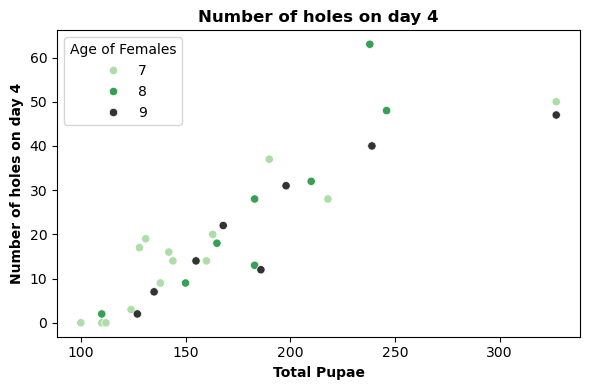

In [11]:
plt.figure(figsize=(6, 4))

sns.scatterplot(data=df, x='Total Pupa', y='Day4 no.holes', hue='Age of Females', palette='Greens_d')

plt.title('Number of holes on day 4', fontweight='bold')
plt.xlabel('Total Pupae', fontweight='bold')
plt.ylabel('Number of holes on day 4', fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/totalpupa_holenumber_hue_age.png', dpi=300, bbox_inches='tight')

plt.show()

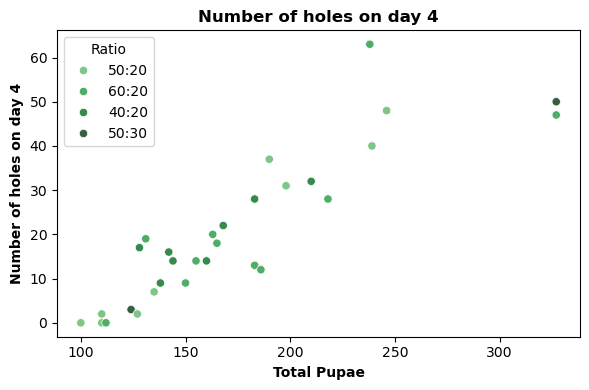

In [17]:
plt.figure(figsize=(6, 4))

sns.scatterplot(data=df, x='Total Pupa', y='Day4 no.holes', hue='Ratio', palette='Greens_d')

plt.title('Number of holes on day 4', fontweight='bold')
plt.xlabel('Total Pupae', fontweight='bold')
plt.ylabel('Number of holes on day 4', fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/totalpupa_holenumber_hue_ratio.png', dpi=300, bbox_inches='tight')

plt.show()

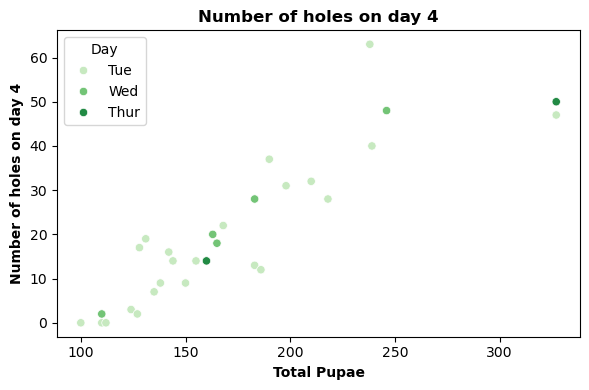

In [25]:
# want to create a hue for the day of collection:

def extract_day(vile_code):
    vile_code = vile_code.lower()  # Convert to lowercase to standardize
    if 'tue' in vile_code:
        return 'Tue'
    elif 'wed' in vile_code:
        return 'Wed'
    elif 'thur' in vile_code:
        return 'Thur'
    else:
        return 'Other'  # For any codes that don't contain any of the days

# Apply the function to the 'Vile Code' column
df['Day'] = df['Vile Code'].apply(extract_day)



plt.figure(figsize=(6, 4))

sns.scatterplot(data=df, x='Total Pupa', y='Day4 no.holes', hue='Day', palette='Greens')

plt.title('Number of holes on day 4', fontweight='bold')
plt.xlabel('Total Pupae', fontweight='bold')
plt.ylabel('Number of holes on day 4', fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/totalpupa_holenumber_hue_dayofcollection.png', dpi=300, bbox_inches='tight')

plt.show()



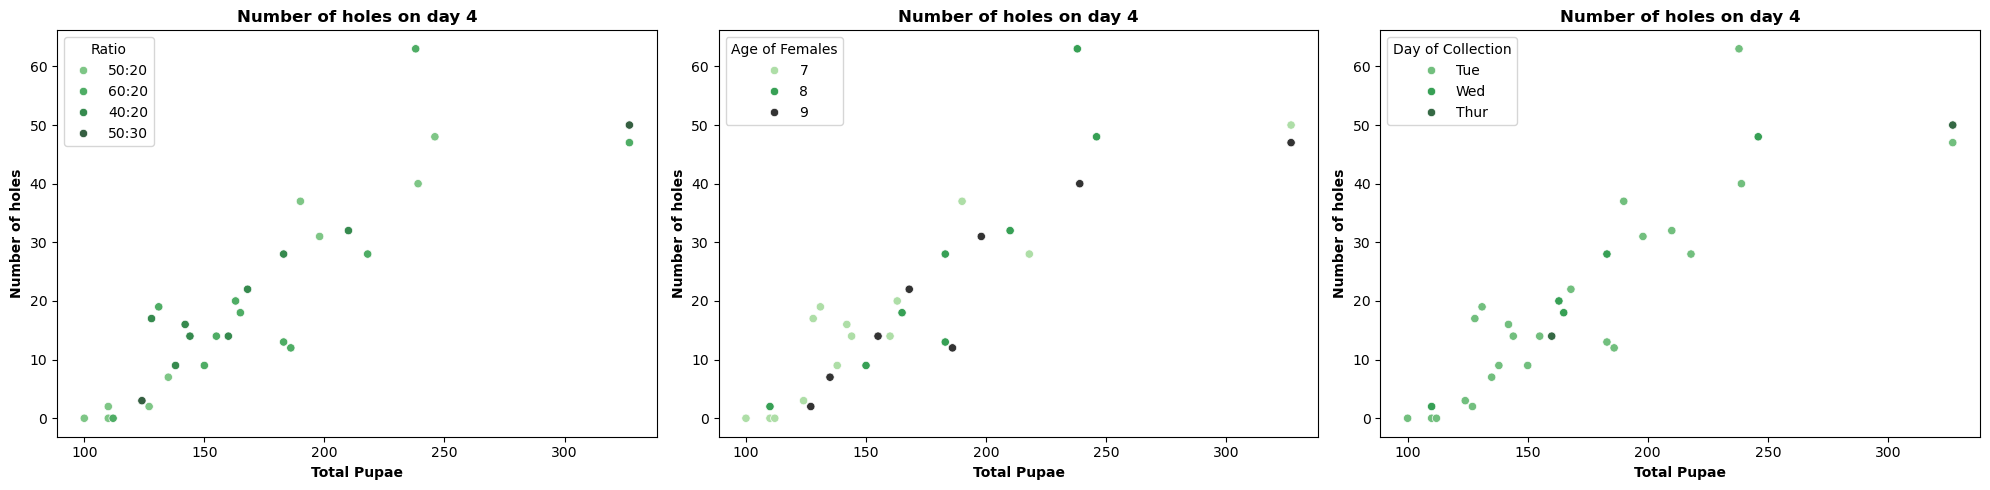

In [35]:
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # Adjust the size as needed

# First subplot
sns.scatterplot(ax=axes[0], data=df, x='Total Pupa', y='Day4 no.holes', hue='Ratio', palette='Greens_d')
axes[0].set_title('Number of holes on day 4', fontweight='bold')
axes[0].set_xlabel('Total Pupae', fontweight='bold')
axes[0].set_ylabel('Number of holes', fontweight='bold')


# Second subplot
sns.scatterplot(ax=axes[1], data=df, x='Total Pupa', y='Day4 no.holes', hue='Age of Females', palette='Greens_d')
axes[1].set_title('Number of holes on day 4', fontweight='bold')
axes[1].set_xlabel('Total Pupae', fontweight='bold')
axes[1].set_ylabel('Number of holes', fontweight='bold')


# Third subplot
sns.scatterplot(ax=axes[2], data=df, x='Total Pupa', y='Day4 no.holes', hue='Day', palette='Greens_d')
axes[2].set_title('Number of holes on day 4', fontweight='bold')
axes[2].set_xlabel('Total Pupae', fontweight='bold')
axes[2].set_ylabel('Number of holes', fontweight='bold')

legend = axes[2].legend()
legend.set_title('Day of Collection')

# Adjusting the layout
plt.tight_layout()

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/totalpupa_holenumber_subplot.png', dpi=300, bbox_inches='tight')

# Show the combined figure with the three subplots
plt.show()